In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
df=pd.read_csv("covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [237]:
df.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational','Time','Deaths'],axis=1,inplace=True)

In [238]:
df.head()

,Date,State/UnionTerritory,Cured,Confirmed
0,2020-01-30,Kerala,0,1
1,2020-01-31,Kerala,0,1
2,2020-02-01,Kerala,0,2
3,2020-02-02,Kerala,0,3
4,2020-02-03,Kerala,0,3


In [239]:
df.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Confirmed               0
dtype: int64

In [240]:
df1=df.drop([15846,15882])

In [241]:
df1.loc[df['State/UnionTerritory'] == 'Bihar****']

,Date,State/UnionTerritory,Cured,Confirmed


In [242]:
df1.shape

(16380, 4)

In [243]:
df1.head()

,Date,State/UnionTerritory,Cured,Confirmed
0,2020-01-30,Kerala,0,1
1,2020-01-31,Kerala,0,1
2,2020-02-01,Kerala,0,2
3,2020-02-02,Kerala,0,3
4,2020-02-03,Kerala,0,3


In [244]:
df1['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

In [245]:
df3=df.loc[df['State/UnionTerritory'] == 'Cases being reassigned to states']

In [246]:
df5=df1.drop(df3.index)

In [247]:
df5.shape


(16320, 4)

In [248]:
df5.head()

,Date,State/UnionTerritory,Cured,Confirmed
0,2020-01-30,Kerala,0,1
1,2020-01-31,Kerala,0,1
2,2020-02-01,Kerala,0,2
3,2020-02-02,Kerala,0,3
4,2020-02-03,Kerala,0,3


In [249]:
df5.isna().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Confirmed               0
dtype: int64

In [250]:
def chang_date(df):
    year=[]
    day=[]
    for i in range(len(df)):
        year.append(int(df.iloc[i,0].split("-")[0]))
        day.append(int(df.iloc[i,0].split("-")[2]))
    return year,day  

In [251]:
p,q=chang_date(df5)

In [252]:
df5['year']=pd.DataFrame(p)

In [253]:
df5.head()

,Date,State/UnionTerritory,Cured,Confirmed,year
0,2020-01-30,Kerala,0,1,2020.0
1,2020-01-31,Kerala,0,1,2020.0
2,2020-02-01,Kerala,0,2,2020.0
3,2020-02-02,Kerala,0,3,2020.0
4,2020-02-03,Kerala,0,3,2020.0


In [254]:
df5=df5.dropna()

In [255]:
df5['year'].apply(lambda x:int(x))

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
16315    2021
16316    2021
16317    2021
16318    2021
16319    2021
Name: year, Length: 16258, dtype: int64

In [256]:
df5['day']=pd.DataFrame(q)

In [257]:
df5.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Confirmed               0
year                    0
day                     0
dtype: int64

In [258]:
df5.head()

,Date,State/UnionTerritory,Cured,Confirmed,year,day
0,2020-01-30,Kerala,0,1,2020.0,30
1,2020-01-31,Kerala,0,1,2020.0,31
2,2020-02-01,Kerala,0,2,2020.0,1
3,2020-02-02,Kerala,0,3,2020.0,2
4,2020-02-03,Kerala,0,3,2020.0,3


In [259]:
df5['year'].unique()

array([2020., 2021.])

In [260]:
df5['year']=df5.year.apply(lambda x:int(x))

In [261]:
df5.head()

,Date,State/UnionTerritory,Cured,Confirmed,year,day
0,2020-01-30,Kerala,0,1,2020,30
1,2020-01-31,Kerala,0,1,2020,31
2,2020-02-01,Kerala,0,2,2020,1
3,2020-02-02,Kerala,0,3,2020,2
4,2020-02-03,Kerala,0,3,2020,3


In [262]:
df5['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Daman & Diu', 'Lakshadweep', 'Telangana',
       'Dadra and Nagar Haveli'], dtype=object)

In [263]:
df5.drop(['Date'],axis=1,inplace=True)

In [264]:
df5.head()

,State/UnionTerritory,Cured,Confirmed,year,day
0,Kerala,0,1,2020,30
1,Kerala,0,1,2020,31
2,Kerala,0,2,2020,1
3,Kerala,0,3,2020,2
4,Kerala,0,3,2020,3


In [265]:
df5.rename(columns={'State/UnionTerritory':'state'},inplace=True)

In [266]:
df5.head()

,state,Cured,Confirmed,year,day
0,Kerala,0,1,2020,30
1,Kerala,0,1,2020,31
2,Kerala,0,2,2020,1
3,Kerala,0,3,2020,2
4,Kerala,0,3,2020,3


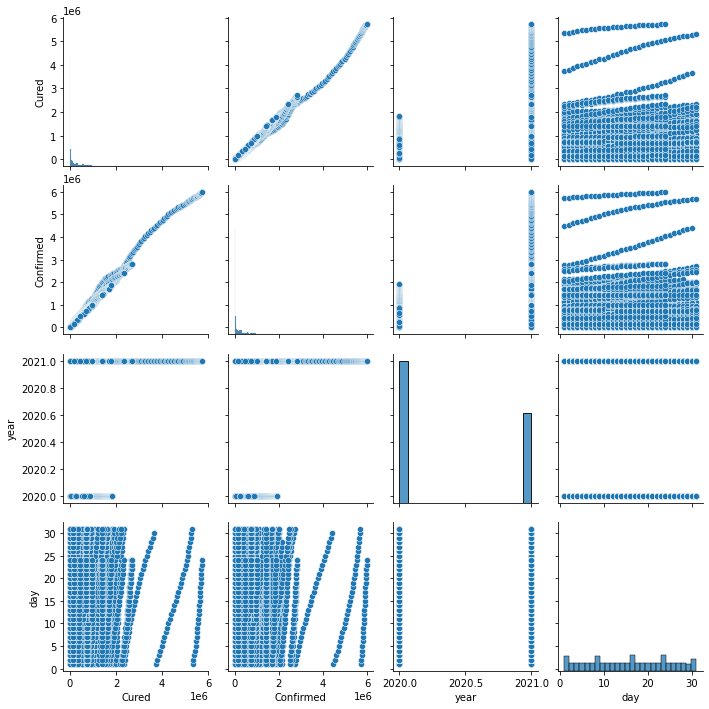

In [267]:
import seaborn as sns
sns.pairplot(df5)

In [268]:
dummies = pd.get_dummies(df5.state)
dummies.head(3)

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,Daman & Diu,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
df5=pd.concat([df5,dummies],axis=1)

In [270]:
df5.drop(['state'],axis=1,inplace=True)

In [271]:
df5.head()

,Cured,Confirmed,year,day,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,1,2020,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2020,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,2020,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,2020,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,2020,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
df5.head()

,Cured,Confirmed,year,day,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,0,1,2020,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2020,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,2020,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,2020,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,2020,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
X=df5.drop(['Cured'],axis=1)

In [274]:
y=df5.Cured

In [275]:
X=X.dropna()

In [276]:
X.head()

,Confirmed,year,day,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
0,1,2020,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2020,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2020,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2020,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
y=y.dropna()

In [278]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Cured, dtype: int64

In [279]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [280]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [281]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [282]:
reg.score(X_test,y_test)

0.9996705967731468

In [283]:
def predict_covid(state,Confirmed,year,day):    
    loc_index = np.where(X.columns==state)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Confirmed
    x[1] = year
    x[2] = day
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [284]:
predict_covid('Kerala',345 ,2021 ,26)

166.44

In [285]:
import pickle
pickle.dump(reg,open('covid_19.pkl','wb'))

In [286]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))